<a href="https://colab.research.google.com/github/Su-Ng/MarketBasketAnalysis/blob/main/MarketBasketAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample data used to conduct market basket analysis

In [ ]:
transactions=[
['curd','sour cream'],['curd','orange','sour cream'],
['bread','cheese','butter'],['bread','butter'],['bread','milk'],
['apple','orange','pear'],['bread','milk','eggs'],['tea','lemon'],
['curd','sour cream','apple'],['eggs','wheat flour','milk'],
['pasta','cheese'],['bread','cheese'],['pasta','olive','cheese'],
['curd','jam'],['bread','cheese','butter'], 
['bread','sour cream','butter'],['strawberry','sour cream'],
['curd','sour cream'],['bread','coffee'],['onion','garlic']
]

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
encoder=TransactionEncoder()

In [ ]:
encoded_array=encoder.fit(transactions).transform(transactions)

In [ ]:
df_itemsets=pd.DataFrame(encoded_array, columns=encoder.columns_)

In [ ]:
df_itemsets

,apple,bread,butter,cheese,coffee,curd,eggs,garlic,jam,lemon,milk,olive,onion,orange,pasta,pear,sour cream,strawberry,tea,wheat flour
0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False
2,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
5,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False
6,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
8,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
9,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True


In [ ]:
Identifying Frequent Itemsets, using the apriori function to 

SyntaxError: ignored

In [ ]:
print('NUmber of Transactions:',len(transactions))

NUmber of Transactions: 20


In [ ]:
print('Number of Unique Items:',len(set(sum(transactions,[]))))

Number of Unique Items: 20


In [ ]:
from mlxtend.frequent_patterns import apriori

In [ ]:
frequent_itemsets=apriori(df_itemsets,min_support=0.1, use_colnames=True)

In [ ]:
print(frequent_itemsets)

    support                 itemsets
0      0.10                  (apple)
1      0.40                  (bread)
2      0.20                 (butter)
3      0.25                 (cheese)
4      0.25                   (curd)
5      0.10                   (eggs)
6      0.15                   (milk)
7      0.10                 (orange)
8      0.10                  (pasta)
9      0.30             (sour cream)
10     0.20          (bread, butter)
11     0.15          (bread, cheese)
12     0.10            (bread, milk)
13     0.10         (butter, cheese)
14     0.10          (pasta, cheese)
15     0.20       (sour cream, curd)
16     0.10             (milk, eggs)
17     0.10  (bread, butter, cheese)


In [ ]:
frequent_itemsets['length']=frequent_itemsets['itemsets'].apply(lambda itemset:len(itemset))

In [ ]:
print(frequent_itemsets[frequent_itemsets['length']>=2])

    support                 itemsets  length
10     0.20          (bread, butter)       2
11     0.15          (bread, cheese)       2
12     0.10            (bread, milk)       2
13     0.10         (butter, cheese)       2
14     0.10          (pasta, cheese)       2
15     0.20       (sour cream, curd)       2
16     0.10             (milk, eggs)       2
17     0.10  (bread, butter, cheese)       3


In [ ]:
from mlxtend.frequent_patterns import association_rules

In [ ]:
rules=association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

In [ ]:
print(rules.iloc[:,0:7])

         antecedents      consequents  antecedent support  consequent support  \
0            (bread)         (butter)                0.40                0.20   
1           (butter)          (bread)                0.20                0.40   
2           (cheese)          (bread)                0.25                0.40   
3             (milk)          (bread)                0.15                0.40   
4           (butter)         (cheese)                0.20                0.25   
5            (pasta)         (cheese)                0.10                0.25   
6       (sour cream)           (curd)                0.30                0.25   
7             (curd)     (sour cream)                0.25                0.30   
8             (milk)           (eggs)                0.15                0.10   
9             (eggs)           (milk)                0.10                0.15   
10   (bread, butter)         (cheese)                0.20                0.25   
11   (bread, cheese)        

In [ ]:
rules_plot=pd.DataFrame()
rules_plot['antecedents']=rules['antecedents'].apply(lambda x:','.join(list(x)))
rules_plot['consequents']=rules['consequents'].apply(lambda x:','.join(list(x)))
rules_plot['lift']=rules['lift'].apply(lambda x:round(x,2))

In [ ]:
pivot=rules_plot.pivot(index='antecedents',columns='consequents', values='lift')
print(pivot)

consequents    bread  bread,cheese  butter  cheese  curd  eggs  milk  \
antecedents                                                            
bread            NaN           NaN    2.50     NaN   NaN   NaN   NaN   
bread,butter     NaN           NaN     NaN     2.0   NaN   NaN   NaN   
bread,cheese     NaN           NaN    3.33     NaN   NaN   NaN   NaN   
butter          2.50          3.33     NaN     2.0   NaN   NaN   NaN   
butter,cheese   2.50           NaN     NaN     NaN   NaN   NaN   NaN   
cheese          1.50           NaN     NaN     NaN   NaN   NaN   NaN   
curd             NaN           NaN     NaN     NaN   NaN   NaN   NaN   
eggs             NaN           NaN     NaN     NaN   NaN   NaN  6.67   
milk            1.67           NaN     NaN     NaN   NaN  6.67   NaN   
pasta            NaN           NaN     NaN     4.0   NaN   NaN   NaN   
sour cream       NaN           NaN     NaN     NaN  2.67   NaN   NaN   

consequents    sour cream  
antecedents                
bread  

In [ ]:
antecedents=list(pivot.index.values)
consequents=list(pivot.columns)
import numpy as np
pivot=pivot.to_numpy()

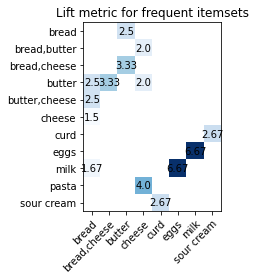

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
fig, ax= plt.subplots()
im= ax.imshow(pivot, cmap='Blues')
ax.set_xticks(np.arange(len(consequents)))
ax.set_yticks(np.arange(len(antecedents)))
ax.set_xticklabels(consequents)
ax.set_yticklabels(antecedents)
plt.setp(ax.get_xticklabels(),rotation=45,ha="right",rotation_mode="anchor")
for i in range(len(antecedents)):
  for j in range(len(consequents)):
    if not np.isnan(pivot[i,j]):
      text=ax.text(j,i,pivot[i,j],ha="center",va="center")
ax.set_title("Lift metric for frequent itemsets")
fig.tight_layout()
plt.show()